In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 데이터 적재

### 1) FLOW_AGE : 연령별 유동인구

In [2]:
dt = [201902, 201903, 201904, 201905, 202002, 202003, 202004, 202005]
list_of_df = []
for i in dt:
    fa = pd.read_csv("4개지역_FLOW_AGE_" + str(i) + ".csv", sep='|')
    list_of_df.append(fa)
FLOW_AGE = pd.concat(list_of_df)

In [4]:
FLOW_AGE.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09


### 2) FLOW_TIME : 시간별 유동인구

In [3]:
list_of_df = []
for i in dt:
    fa = pd.read_csv("4개지역_FLOW_TIME_" + str(i) + ".csv", sep='|')
    list_of_df.append(fa)
FLOW_TIME = pd.concat(list_of_df)

In [5]:
FLOW_TIME.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201902,20190201,1114052000,소공동,1496.35,1022.83,706.51,547.77,1673.02,3561.05,...,12355.91,13096.69,9317.64,15029.74,14135.83,9074.02,6032.26,6047.05,4806.65,2956.11
1,201902,20190201,1114054000,회현동,1692.37,1117.26,839.57,653.41,1920.52,4687.95,...,18210.30,20292.65,12527.29,21454.63,18214.50,11914.26,9800.64,9341.24,6884.91,4034.56
2,201902,20190201,1114055000,명동,2226.91,1726.10,1145.43,894.97,2513.32,5268.51,...,20332.71,21458.64,14434.56,25855.14,23107.23,13460.05,9797.40,8719.30,7203.45,4845.48
3,201902,20190201,1114057000,필동,698.73,440.70,385.99,275.64,497.41,1990.42,...,6900.66,9789.54,6205.74,13277.25,12101.51,5698.58,4464.46,4088.53,3385.14,1746.28
4,201902,20190201,1114058000,장충동,768.34,447.23,429.90,349.46,507.74,1310.67,...,5187.02,5211.60,3656.54,6841.98,5810.71,4463.99,2807.25,2626.12,2415.41,1398.94


# 2. 데이터 탐색

### 1) FLOW_AGE

- 16629행, 34열
- 5세 단위의 연령대로 표현되어있음
- 남자와 여자를 분리하여 count

In [6]:
FLOW_AGE.shape

(16629, 34)

In [7]:
FLOW_AGE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16629 entries, 0 to 2138
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STD_YM                  16629 non-null  int64  
 1   STD_YMD                 16629 non-null  int64  
 2   HDONG_CD                16629 non-null  int64  
 3   HDONG_NM                16629 non-null  object 
 4   MAN_FLOW_POP_CNT_0004   16629 non-null  float64
 5   MAN_FLOW_POP_CNT_0509   16629 non-null  float64
 6   MAN_FLOW_POP_CNT_1014   16629 non-null  float64
 7   MAN_FLOW_POP_CNT_1519   16629 non-null  float64
 8   MAN_FLOW_POP_CNT_2024   16629 non-null  float64
 9   MAN_FLOW_POP_CNT_2529   16629 non-null  float64
 10  MAN_FLOW_POP_CNT_3034   16629 non-null  float64
 11  MAN_FLOW_POP_CNT_3539   16629 non-null  float64
 12  MAN_FLOW_POP_CNT_4044   16629 non-null  float64
 13  MAN_FLOW_POP_CNT_4549   16629 non-null  float64
 14  MAN_FLOW_POP_CNT_5054   16629 non-null 

In [8]:
FLOW_AGE.describe()

,STD_YM,STD_YMD,HDONG_CD,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
count,16629.000000,1.662900e+04,1.662900e+04,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,...,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000
mean,201953.734440,2.019539e+07,1.934917e+09,0.251030,108.137365,531.920467,1298.069702,2122.201959,3073.057537,3305.008270,...,2892.077705,2609.956665,3033.207738,3207.318511,3727.166948,3301.897541,2983.403507,2570.383734,1650.261642,2055.039596
std,50.007105,5.000782e+03,7.975501e+08,1.290535,103.639273,478.810913,1106.500714,2110.744773,2678.503491,3040.606454,...,2979.672350,2652.628406,2603.236132,2412.606170,2658.004291,2316.298392,2138.541990,1836.643282,1179.354604,1462.081042
min,201902.000000,2.019020e+07,1.114052e+09,0.000000,2.280000,7.530000,26.030000,87.100000,148.140000,109.530000,...,79.170000,76.310000,87.250000,95.500000,112.130000,100.320000,101.250000,82.530000,53.250000,78.390000
25%,201904.000000,2.019040e+07,1.135058e+09,0.000000,44.360000,215.910000,558.050000,893.610000,1325.880000,1413.560000,...,1129.310000,1047.380000,1387.380000,1636.520000,1945.400000,1802.340000,1616.100000,1362.660000,847.790000,1047.670000
50%,202002.000000,2.020020e+07,2.711052e+09,0.000000,81.050000,397.500000,978.110000,1440.280000,2176.470000,2354.900000,...,1916.950000,1753.330000,2220.450000,2511.880000,3047.660000,2659.130000,2332.270000,2041.250000,1351.340000,1657.630000
75%,202004.000000,2.020040e+07,2.726056e+09,0.000000,139.890000,703.540000,1676.600000,2498.440000,3633.150000,3822.350000,...,3220.080000,3027.330000,3627.580000,3927.930000,4638.960000,4039.970000,3600.340000,3104.340000,2070.040000,2687.290000
max,202005.000000,2.020053e+07,2.726069e+09,33.340000,2293.170000,8659.700000,10424.450000,21164.540000,20860.510000,25067.430000,...,25496.860000,23188.000000,20998.370000,18161.170000,18706.660000,16914.180000,15058.290000,15402.520000,11384.790000,13758.240000


### 2) FLOW_TIME

- 16629행, 28열
- 한시간 단위의 시간대로 표현되어있음

In [9]:
FLOW_TIME.shape

(16629, 28)

In [10]:
FLOW_TIME.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16629 entries, 0 to 2138
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STD_YM    16629 non-null  int64  
 1   STD_YMD   16629 non-null  int64  
 2   HDONG_CD  16629 non-null  int64  
 3   HDONG_NM  16629 non-null  object 
 4   TMST_00   16629 non-null  float64
 5   TMST_01   16629 non-null  float64
 6   TMST_02   16629 non-null  float64
 7   TMST_03   16629 non-null  float64
 8   TMST_04   16629 non-null  float64
 9   TMST_05   16629 non-null  float64
 10  TMST_06   16629 non-null  float64
 11  TMST_07   16629 non-null  float64
 12  TMST_08   16629 non-null  float64
 13  TMST_09   16629 non-null  float64
 14  TMST_10   16629 non-null  float64
 15  TMST_11   16629 non-null  float64
 16  TMST_12   16629 non-null  float64
 17  TMST_13   16629 non-null  float64
 18  TMST_14   16629 non-null  float64
 19  TMST_15   16629 non-null  float64
 20  TMST_16   16629 non-null  flo

In [11]:
FLOW_TIME.describe()

,STD_YM,STD_YMD,HDONG_CD,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
count,16629.000000,1.662900e+04,1.662900e+04,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,...,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,16629.000000,16629.00000,16629.000000,16629.000000,16629.000000
mean,201953.734440,2.019539e+07,1.934917e+09,1096.592585,781.228729,616.821247,527.778163,554.116271,882.042583,1700.909296,...,4391.027317,4503.440960,4671.712484,5087.704634,5565.217322,4398.294772,3403.95161,3050.477071,2554.998554,1750.433950
std,50.007105,5.000782e+03,7.975501e+08,735.613381,527.100154,435.174850,389.299376,419.130691,744.127345,1715.551960,...,3484.552668,3479.704013,3524.802090,3853.679213,4272.601745,3121.538646,2303.78085,2058.391328,1739.913334,1197.751867
min,201902.000000,2.019020e+07,1.114052e+09,48.740000,32.340000,8.940000,19.050000,13.400000,31.270000,41.540000,...,155.870000,147.340000,208.370000,195.500000,171.870000,176.850000,103.23000,116.190000,84.180000,60.660000
25%,201904.000000,2.019040e+07,1.135058e+09,579.520000,401.760000,304.840000,252.400000,258.030000,406.610000,747.830000,...,2202.840000,2300.140000,2433.380000,2639.290000,2813.310000,2334.940000,1863.54000,1677.910000,1362.700000,929.020000
50%,202002.000000,2.020020e+07,2.711052e+09,893.850000,634.090000,482.500000,392.510000,405.070000,626.100000,1145.200000,...,3315.060000,3434.140000,3598.970000,3887.980000,4202.490000,3367.630000,2717.62000,2475.000000,2056.040000,1415.130000
75%,202004.000000,2.020040e+07,2.726056e+09,1414.980000,1012.010000,805.390000,694.900000,744.250000,1143.310000,1946.080000,...,5195.380000,5309.580000,5557.270000,6025.730000,6637.770000,5540.790000,4248.70000,3834.550000,3251.810000,2198.360000
max,202005.000000,2.020053e+07,2.726069e+09,5019.920000,3758.760000,3022.400000,2492.280000,2840.740000,6262.410000,17214.930000,...,28557.360000,27325.840000,38526.960000,35061.330000,32748.730000,26602.660000,28078.82000,18929.070000,17777.490000,8623.740000


# 3. 데이터 전처리

### 1) 날짜 형식으로 변환 : STD_YMD을 날짜타입으로

In [12]:
FLOW_AGE['STD_YMD'] = FLOW_AGE['STD_YMD'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
FLOW_TIME['STD_YMD'] = FLOW_TIME['STD_YMD'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

### 2) int를 str로 : STD_YM, HDONG_CD

In [ ]:
#FLOW_AGE.dtypes

In [13]:
FLOW_AGE['STD_YM'] = FLOW_AGE['STD_YM'].astype(str)

In [ ]:
#FLOW_TIME.dtypes

In [14]:
FLOW_TIME['STD_YM'] = FLOW_TIME['STD_YM'].astype(str)

### 3) WEEK_NUM 컬럼 추가

In [15]:
FLOW_AGE['WEEK_NUM'] = FLOW_AGE.STD_YMD.apply(lambda X: X.strftime('%V'))
FLOW_TIME['WEEK_NUM'] = FLOW_TIME.STD_YMD.apply(lambda X: X.strftime('%V'))

In [16]:
FLOW_AGE['WEEK_NUM'].unique()

array(['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20', '21', '22'], dtype=object)

In [ ]:
# 인덱스가 STD_YMD인 새로운 df ==> FLOW_AGE_DATE, FLOW_TIME_DATE
FLOW_AGE_DATE = FLOW_AGE.set_index(FLOW_AGE['STD_YMD'])
FLOW_AGE_DATE = FLOW_AGE_DATE.drop('STD_YMD', axis = 1)

FLOW_TIME_DATE = FLOW_TIME.set_index(FLOW_TIME['STD_YMD'])
FLOW_TIME_DATE = FLOW_TIME_DATE.drop('STD_YMD', axis = 1)

In [ ]:
FLOW_AGE_DATE.head()

In [ ]:
#Weekly_AGE = FLOW_AGE_DATE.resample('W-Mon', how={np.sum}).fillna(0)

### 4) 서울/ 대구 구별 분리

In [17]:
FLOW_AGE['HDONG_CD'].unique()

array([1114052000, 1114054000, 1114055000, 1114057000, 1114058000,
       1114059000, 1114060500, 1114061500, 1114062500, 1114063500,
       1114064500, 1114065000, 1114066500, 1114067000, 1114068000,
       1135056000, 1135057000, 1135058000, 1135059500, 1135060000,
       1135061100, 1135061200, 1135061900, 1135062100, 1135062400,
       1135062500, 1135063000, 1135064000, 1135066500, 1135067000,
       1135069500, 1135070000, 1135071000, 1135072000, 2711051700,
       2711054500, 2711056500, 2711057500, 2711058500, 2711059500,
       2711064000, 2711065000, 2711066000, 2711067000, 2711068000,
       2711069000, 2726051000, 2726052000, 2726053000, 2726054000,
       2726055000, 2726056000, 2726056100, 2726057000, 2726058000,
       2726059000, 2726060100, 2726060200, 2726061000, 2726062000,
       2726063000, 2726064000, 2726065100, 2726065200, 2726066100,
       2726066200, 2726067000, 2726068000, 2726069000], dtype=int64)

In [18]:
FLOW_AGE['HDONG_NM'].unique()

array(['소공동', '회현동', '명동', '필동', '장충동', '광희동', '을지로동', '신당동', '다산동',
       '약수동', '청구동', '신당5동', '동화동', '황학동', '중림동', '월계1동', '월계2동', '월계3동',
       '공릉1동', '공릉2동', '하계1동', '하계2동', '중계본동', '중계1동', '중계4동', '중계2.3동',
       '상계1동', '상계2동', '상계3.4동', '상계5동', '상계6.7동', '상계8동', '상계9동',
       '상계10동', '동인동', '삼덕동', '성내1동', '성내2동', '성내3동', '대신동', '남산1동',
       '남산2동', '남산3동', '남산4동', '대봉1동', '대봉2동', '범어1동', '범어2동', '범어3동',
       '범어4동', '만촌1동', '만촌2동', '만촌3동', '수성1가동', '수성2.3가동', '수성4가동',
       '황금1동', '황금2동', '중동', '상동', '파동', '두산동', '지산1동', '지산2동', '범물1동',
       '범물2동', '고산1동', '고산2동', '고산3동'], dtype=object)

In [19]:
SJOONG_AGE = FLOW_AGE[FLOW_AGE['HDONG_CD'] < 1114069000]
NOWON_AGE = FLOW_AGE[(FLOW_AGE['HDONG_CD'] > 1135056000) & (FLOW_AGE['HDONG_CD'] < 1214000000)]
DJOONG_AGE = FLOW_AGE[(FLOW_AGE['HDONG_CD'] > 2711051000) & (FLOW_AGE['HDONG_CD'] < 2726050000)]
SUSEONG_AGE = FLOW_AGE[FLOW_AGE['HDONG_CD'] > 2726050000]

In [20]:
SJOONG_TIME = FLOW_TIME[FLOW_TIME['HDONG_CD'] < 1114069000]
NOWON_TIME = FLOW_TIME[(FLOW_TIME['HDONG_CD'] > 1135056000) & (FLOW_TIME['HDONG_CD'] < 1214000000)]
DJOONG_TIME = FLOW_TIME[(FLOW_TIME['HDONG_CD'] > 2711051000) & (FLOW_TIME['HDONG_CD'] < 2726050000)]
SUSEONG_TIME = FLOW_TIME[FLOW_TIME['HDONG_CD'] > 2726050000]

# 4. 동별 / 주별 분석

### 1) 연령대 유동인구 sum

In [21]:
def flow_sum(df):
    p = df.pivot_table(index=['STD_YM','WEEK_NUM'], columns='HDONG_NM', values='MAN_FLOW_POP_CNT_2529', aggfunc='sum')
    p.plot()
    plt.legend(loc='lower right', bbox_to_anchor = (1.5, 0))

C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.

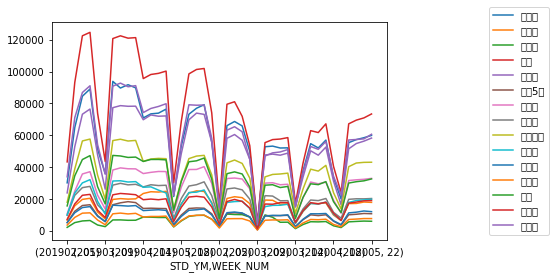

In [22]:
flow_sum(SJOONG_AGE)

In [ ]:
#SJOONG_AGE.pivot_table(index=['STD_YM','WEEK_NUM'],columns='HDONG_NM', values='MAN_FLOW_POP_CNT_2529', aggfunc='sum')

In [ ]:
AGE_SUM = FLOW_AGE_DATE.groupby(FLOW_AGE_DATE.index.to_period('W')).sum()

In [ ]:
AGE_SUM.head()

In [ ]:
AGE_SUM.plot()

### 2) 시간대 유동인구 AVG

In [25]:
def flow_avg(df):
    p = df.pivot_table(index=['STD_YM','WEEK_NUM'], columns='HDONG_NM', values='TMST_18', aggfunc='mean')
    p.plot()
    plt.legend(loc='lower right', bbox_to_anchor = (1.5, 0))

C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.

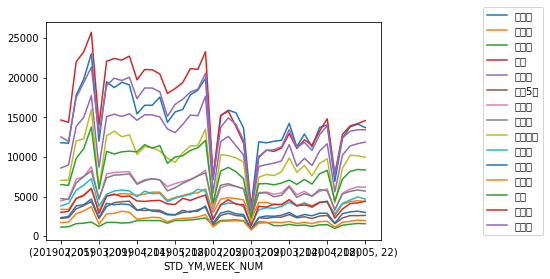

In [26]:
flow_avg(SJOONG_TIME)

In [ ]:
#SJOONG_TIME.pivot_table(index=['STD_YM','WEEK_NUM'], columns='HDONG_NM', values='TMST_18', aggfunc='avg')

In [ ]:
TIME_AVG = FLOW_TIME_DATE.groupby(FLOW_TIME_DATE.index.to_period('W')).agg(['mean', 'sum'])

# 5. 시각화

### 1) FLOW_AGE

### 2) FLOW_TIME

# 6. 지도 시각화